In [1]:
import pandas as pd
import xlrd
import MySQLdb
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# 读取csv/txt
for line in open('test_file.csv'):
    print(line)

In [ ]:
# 读取Excel
file = xlrd.open_workbook('test_file.xlsx')
sheet = file.sheet_by_index(0)

for i in range(sheet.nrows):
    print(sheet.row_values(i))

In [ ]:
# 使用pandas读取csv，得到DataFrame
df = pd.read_csv('test_file.csv')
df

In [ ]:
# 通过pd.read_table将csv/txt读取为DataFrame
# head=0 将第0行设为表头
df = pd.read_table('test_file.txt', header=0, sep='\t')
df

In [2]:
# 读取MySQL里的数据
# 安装MySQL-python会出现ImportError: No module named 'ConfigParser'
# 可以 pip install mysqlclient
db = MySQLdb.connect(host='localhost', 
                     user='root', 
                     passwd='', 
                     db='shiyanlou')
cur = db.cursor()

cur.execute('SELECT * FROM person')

for row in cur.fetchall():
    print(row)
    
db.close()

(1, 'Tom', 110110110)
(2, 'Jack', 119119119)
(3, 'Rose', 112222119)


In [ ]:
# 可以通过df.head(n)、df.tail(n)来获取DataFrame的头部、尾部n行
# n默认为5
df = pd.read_csv('test_file.csv')
# 浏览数据的头部
df.head()

In [ ]:
df = pd.read_csv('test_file.csv')
# 浏览数据的尾部
df.tail()

In [ ]:
df = pd.read_csv('test_file.csv')
df.head(10)

In [3]:
# describe()方法可以对数据集中的数值进行统计
# 会输出数据计数、最大值、最小值等
df = pd.read_csv('test_file.csv')
df.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


In [ ]:
# count()方法可以计算数据集中非空数据的数量
df = pd.read_csv('test_file.csv')
df.count()

In [ ]:
# pandas可以使用isnull()和notnull()来检测缺失值
df = pd.read_csv('test_file_nan.csv')
df.head(10).isnull()

In [ ]:
# 删除缺失值
# dropna()可以移除缺失值，也可以使用axis参数指定某个轴上的缺失值
df = pd.read_csv('test_file_nan.csv')
df.dropna()

In [ ]:
# 使用fillna填充缺失值
# 指定method为pad时，用前面的临近值进行填充
df = pd.read_csv('test_file_nan.csv')
df.head(10).fillna(method='pad')

In [ ]:
# 当指定method为bfill时，使用后面的临近值进行填充
df = pd.read_csv('test_file_nan.csv')
df.head(10).fillna(method='bfill')

# 除了临近填充，有时还会用mean()进行平均值填充

In [ ]:
# 可以使用interpolate()进行插值填充
# 默认为线性插值，即method='linear
df = pd.read_csv('test_file_nan.csv')
df.interpolate().head(10)
# 还有其它一些插值方法，如：
# quadratic 二次插值
# pchip 累计分布
# akima  平滑插值

In [ ]:
# 通过get_dummies()可以将以分类形式存在的变量转换为独热编码
df = pd.read_csv('one_hot_demo.csv', header=0)
one_hot = pd.get_dummies(df[['status', 'color']])
one_hot.head(10)

In [ ]:
# 使用duplicated可以标识重复数据
df = pd.read_csv('one_hot_demo.csv', header=0)
pd.DataFrame.duplicated(df).head(10)

In [ ]:
# 使用drop_duplicates()可以返回一个去重后的数据集
df = pd.read_csv('one_hot_demo.csv', header=0)
pd.DataFrame.drop_duplicates(df)

### 箱形图

![](https://dn-anything-about-doc.qbox.me/document-uid214893labid3464timestamp1504834866908.png)

[103892  89779 101279  93193  94396 105549  93524 103689  91725  85040]


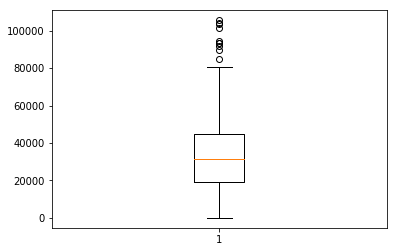

In [4]:
data = pd.read_csv('test_file.csv', header=0)
tp = data['Total Population']
p = plt.boxplot(tp)
plt  # 绘制箱形图
outlier = p['fliers'][0].get_ydata()  # 将离群点标记并导出
print(outlier)

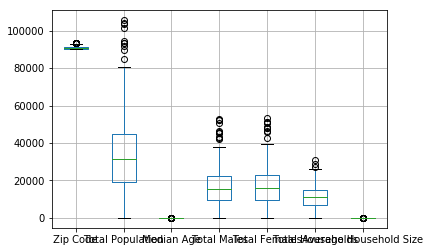

In [5]:
# DataFrame可以很方便的将所有列数据的箱形图画在一张图中对比
data = pd.read_csv('test_file.csv', header=0)
data.boxplot()